In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot12

In [36]:
df1=pd.read_csv("/content/diabetes.csv")

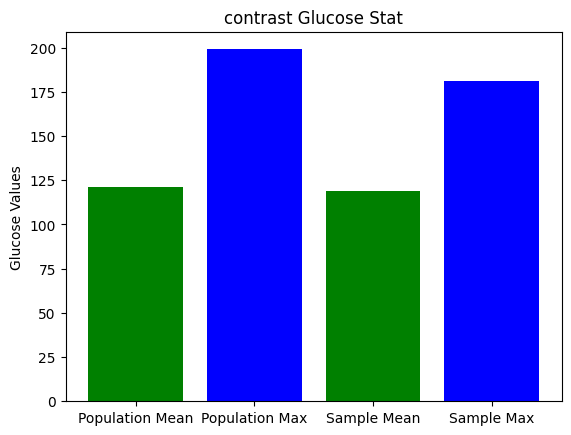

In [37]:

np.random.seed(709)


smp = df1.sample(25)

pop_mean_glcse = df1['Glucose'].mean()
pop_max_glcse = df1['Glucose'].max()

smp_mean_glcse = smp['Glucose'].mean()
smp_max_glcse = smp['Glucose'].max()



lbs = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
vls = [pop_mean_glcse, pop_max_glcse, smp_mean_glcse, smp_max_glcse]

plot12.bar(lbs, vls, color=['green', 'blue', 'green', 'blue'])
plot12.title('contrast Glucose Stat')
plot12.ylabel('Glucose Values')
plot12.show()


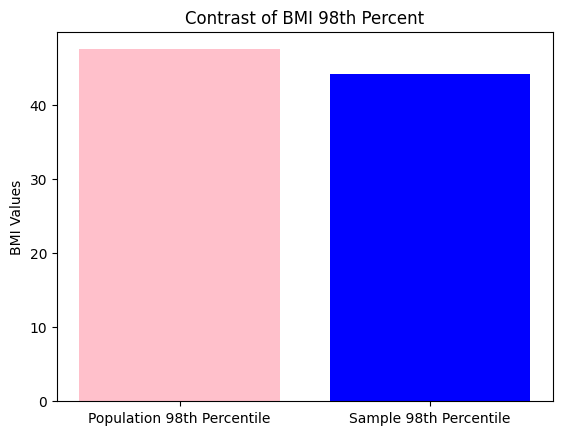

In [38]:
pop_percent = np.percentile(df1['BMI'], 98)
smp_percent = np.percentile(smp['BMI'], 98)

lbs = ['Population 98th Percentile', 'Sample 98th Percentile']
vls = [pop_percent, smp_percent]

plot12.bar(lbs, vls, color=['pink', 'blue'])
plot12.title('Contrast of BMI 98th Percent')
plot12.ylabel('BMI Values')
plot12.show()

In [39]:

bootstrp_sam = 500
smp_size = 150


bootstrp_means = np.zeros(bootstrp_sam)
bootstrp_std_devs = np.zeros(bootstrp_sam)
bootstrp_percent = np.zeros(bootstrp_sam)

for i in range(bootstrp_sam):
    bootstrp_samp = df1['BloodPressure'].sample(smp_size, replace=True)
    bootstrp_means[i] = bootstrp_samp.mean()
    bootstrp_std_devs[i] = bootstrp_samp.std()
    bootstrp_percent[i] = np.percentile(bootstrp_samp, 98)


population_mean = df1['BloodPressure'].mean()
pop_std_dev = df1['BloodPressure'].std()
pop_percentile = np.percentile(df1['BloodPressure'], 98)


bmean12=np.mean(bootstrp_means)
bsd12=np.mean(bootstrp_std_devs)
bp12=np.mean(bootstrp_percent)


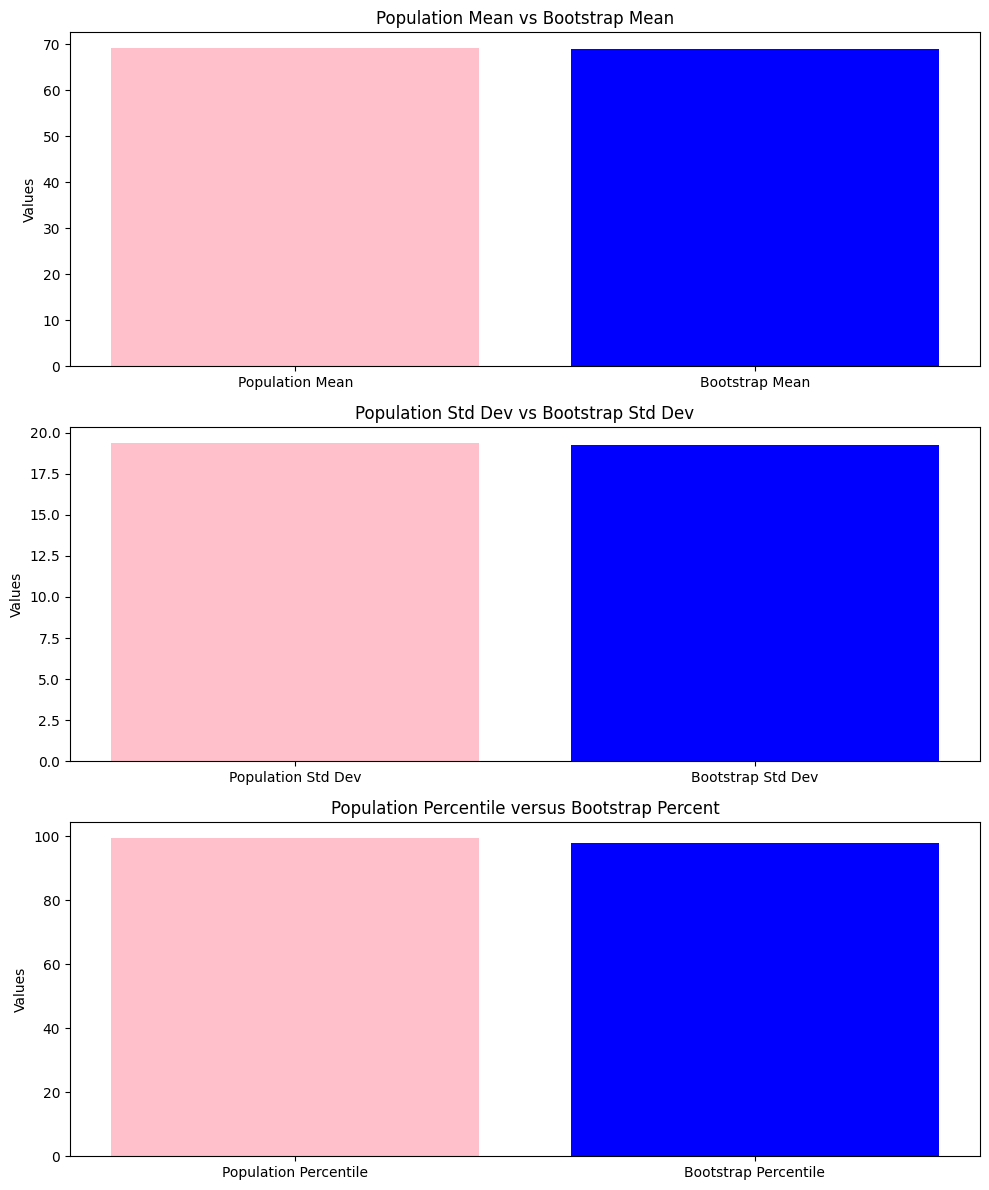

In [40]:
fig, axis1 = plot12.subplots(3, 1, figsize=(10, 12))


axis1[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean12], color=['pink', 'blue'])
axis1[0].set_ylabel('Values')
axis1[0].set_title('Population Mean vs Bootstrap Mean')


axis1[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [pop_std_dev, bsd12], color=['pink', 'blue'])
axis1[1].set_ylabel('Values')
axis1[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axis1[2].bar(['Population Percentile', 'Bootstrap Percentile'], [pop_percentile, bp12], color=['pink', 'blue'])
axis1[2].set_ylabel('Values')
axis1[2].set_title('Population Percentile versus Bootstrap Percent')

plot12.tight_layout()
plot12.show()